# Make Sure that you install the requred libraries 

In [1]:
!pip install -r requirements.txt

# Clone the repository:

In [5]:
# clone the repository here
# change the directory here 

# List the files in the folder

In [6]:
ls

analysis_tools/           HEL1OS.md              images/
event_list_schematic.png  HLSDemoNotebook.ipynb  requirements.txt


## Make sure that you have the corresponding event data "evt.fits" in an appropriate folder. 
Confirm using "ls"

In [6]:
# ls [the path to event data should be tested here]

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
evt.fits


## Let's have a look at the scripts available in "analysis_scripts"

In [7]:
ls ./analysis_tools/

evt-to-TypeII_V02.py  LcFromEvtFile_V06.py  TypeII-to-TypeI_V06_plotly.py


## Demo 1: Generating Light Curves from Event Data using "LcFromEvtFile_V06.py"
- This script takes "evt.fits" file, which lists every individual X-ray photon detected, as input and generates user defined light curves as output.
- It will display the light curves and will also saves the light curves as .csv file. This output file can be displayed and analyzed by the user later.
**The user wil need to provide the folowing inputs in a COMMAND LINE while executing the script**:
1. **mode**: User may select any of the following ***CDTE1, CDTE2, CZT1, CZT2, CDTE_TOTAL or CZT_TOTAL*** as mode.  Each indicates either individual detector or combined detector. For example: "***--mode CZT1***" will generate light curve of CZT1 detector only, while "***--mode CZT_TOTAL***" will generate a combined light curve using data from both CZT detectors, and so on.
2. **start_time**: User should provide the desired ***start time*** in format ***yyyy-mm-ddThh:mm:ss.sss***. For example: "***--start_time 2025-10-15T13:00:00.000***"
3. **end_time**: User should provide the desired ***end time*** in format ***yyyy-mm-ddThh:mm:ss.sss***. For example: "***--end_time 2025-10-15T14:30:00.000***"
4. **time_bin_size**: User should provide the desired binning size in **seconds** for the light curve which will define the cadence of each data point in the light curve. The default cadence of the event data is 10 millisecond. For example: "***--time_bin_size 10***"
5. **output file**: User may provide give a name for the output file. Else, the light curve will saved in default file name "binned_lightcurve.csv". For example  "***--output LightCurve.csv***"

## example COMMAND LINE with all above inputs is given below:    
"*python LcFromEvtFile.py --fits_file evt.fits --mode CZT1 --start_time 2025-10-15T13:00:00.000 --end_time 2025-10-15T14:30:00.000 --time_bin_size 10 --output LightCurve.csv*"

### After executing the command line, the user will be asked to select from two options 1 and 2
CDTE FULL ENERGY RANGE 5 - 90 keV, CZT FULL ENERGY RANGE 20 - 200 keV
USER SHOULD ENTER 1 or 2
   
1. LIGHT CURVES WITH USER DEFINED ENERGY RANGE(S)
   User will be asked to:
   Enter Emin and Emax in keV (Seperated by space):= (For example: 30 90)
   Note: user can give multiple energy ranges by following the prompt(Would you like to generate another energy bin? [y/n])
   
2. LIGHT CURVES WITH USER DEFINED FIXED ENERGY BIN SIZE FOR FULL ENERGY RANGE
   User will be asked to:
   Enter desired energy bin size in keV (for example: 20)
   As a output, light curves will be in the following energy bins
   For CZT : 20 - 40, 40 - 60, 60 - 80,.. upto 200 keV
   For CdTe :5  - 25, 25 - 45, 45 - 65,.. upto 90 keV
   Note: MAX 10 energy bins light curves will be displayed, However, all bins data is stored in .csv file

ENTER 1 or 2 :


  
CDTE FULL ENERGY RANGE 5 - 90 keV, CZT FULL ENERGY RANGE 20 - 200 keV
USER SHOULD ENTER 1 or 2
   
1. LIGHT CURVES WITH USER DEFINED ENERGY RANGE(S)
   User will be asked to:
   Enter Emin and Emax in keV (Seperated by space):= (For example: 30 90)
   Note: user can give multiple energy ranges by following the prompt(Would you like to generate another energy bin? [y/n])
   
2. LIGHT CURVES WITH USER DEFINED FIXED ENERGY BIN SIZE FOR FULL ENERGY RANGE
   User will be asked to:
   Enter desired energy bin size in keV (for example: 20)
   As a output, light curves will be in the following energy bins
   For CZT : 20 - 40, 40 - 60, 60 - 80,.. upto 200 keV
   For CdTe :5  - 25, 25 - 45, 45 - 65,.. upto 90 keV
   Note: MAX 10 energy bins light curves will be displayed, However, all bins data is stored in .csv file
   


ENTER 1 or 2 :  2
Enter desired energy bin size in keV:  5


CSV file saved as 'Lc.csv'
 


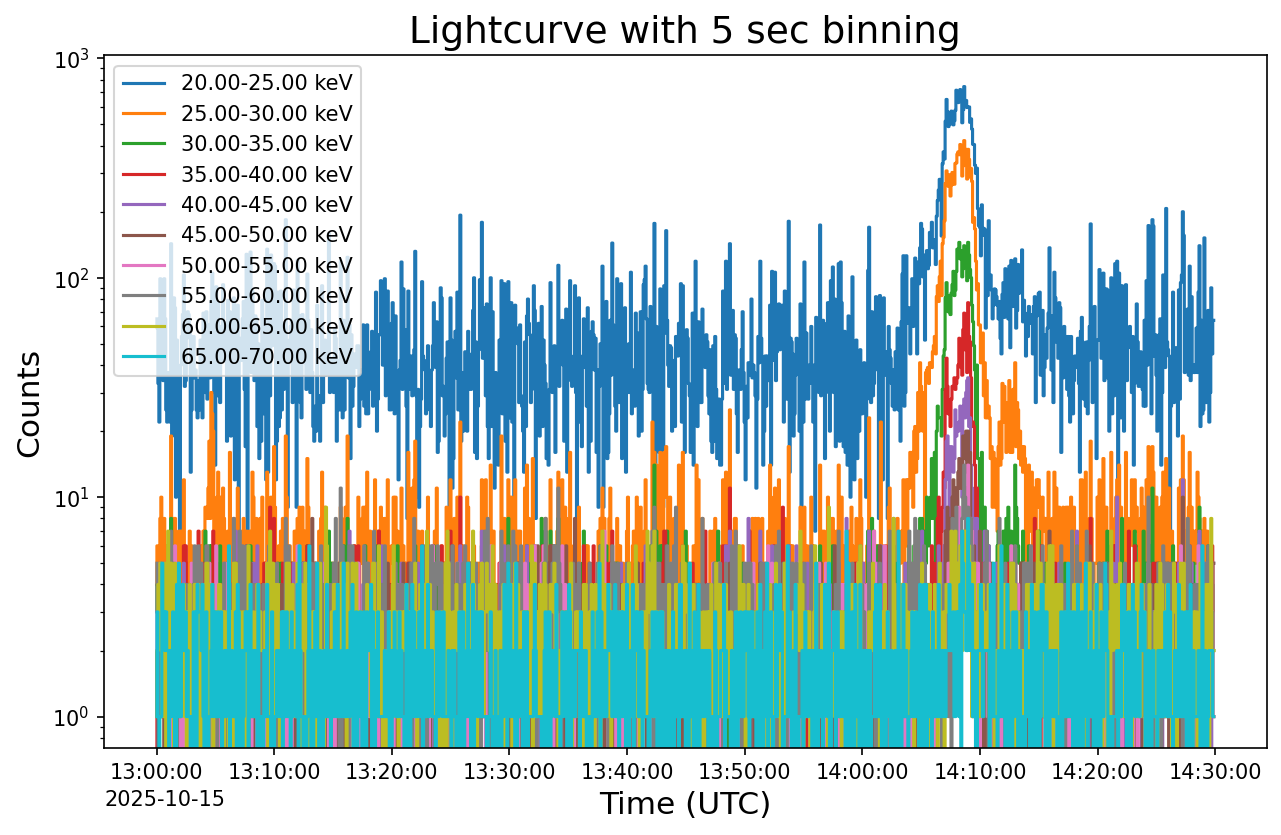

In [25]:
%run ./analysis_tools/LcFromEvtFile_V06.py --fits_file /home/manju/Documents/JAP_PhD2024/HEL1OS_Notebook_Tools_XpsecModels_Version2/HEL1OS_Instrument_DataAnalysisDemo/data/evt.fits --mode CZT1 --start_time 2025-10-15T13:00:00.000 --end_time 2025-10-15T14:30:00.000 --time_bin_size 5 --output Lc.csv

### How do you use the light curve data?
**Step 1**. Load and inspect the data

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Load the data
df = pd.read_csv("Lc.csv")

# 2. Convert string time to datetime objects
df["Time"] = pd.to_datetime(df["Time (UTC)"])
df.set_index("Time", inplace=True)

# 3. Preview the data
print("Available Energy Bands:", df.columns.tolist())
df.head()

Available Energy Bands: ['Time (UTC)', '20.00-25.00 keV', '25.00-30.00 keV', '30.00-35.00 keV', '35.00-40.00 keV', '40.00-45.00 keV', '45.00-50.00 keV', '50.00-55.00 keV', '55.00-60.00 keV', '60.00-65.00 keV', '65.00-70.00 keV', '70.00-75.00 keV', '75.00-80.00 keV', '80.00-85.00 keV', '85.00-90.00 keV', '90.00-95.00 keV', '95.00-100.00 keV', '100.00-105.00 keV', '105.00-110.00 keV', '110.00-115.00 keV', '115.00-120.00 keV', '120.00-125.00 keV', '125.00-130.00 keV', '130.00-135.00 keV', '135.00-140.00 keV', '140.00-145.00 keV', '145.00-150.00 keV', '150.00-155.00 keV', '155.00-160.00 keV', '160.00-165.00 keV', '165.00-170.00 keV', '170.00-175.00 keV', '175.00-180.00 keV', '180.00-185.00 keV', '185.00-190.00 keV', '190.00-195.00 keV', '195.00-200.00 keV']


,Time (UTC),20.00-25.00 keV,25.00-30.00 keV,30.00-35.00 keV,35.00-40.00 keV,40.00-45.00 keV,45.00-50.00 keV,50.00-55.00 keV,55.00-60.00 keV,60.00-65.00 keV,...,150.00-155.00 keV,155.00-160.00 keV,160.00-165.00 keV,165.00-170.00 keV,170.00-175.00 keV,175.00-180.00 keV,180.00-185.00 keV,185.00-190.00 keV,190.00-195.00 keV,195.00-200.00 keV
Time,,,,,,,,,,,,,,,,,,,,,
2025-10-15 13:00:01.959,2025-10-15 13:00:01.959,65,4,3,0,3,1,3,5,1,...,1,1,2,1,0,2,1,2,2,2
2025-10-15 13:00:06.959,2025-10-15 13:00:06.959,59,6,4,2,3,2,2,3,2,...,2,0,1,1,2,2,1,1,4,0
2025-10-15 13:00:11.959,2025-10-15 13:00:11.959,33,4,4,1,0,0,1,2,4,...,1,3,1,1,1,3,2,1,2,2
2025-10-15 13:00:16.959,2025-10-15 13:00:16.959,22,1,1,2,3,2,2,1,4,...,2,0,1,0,0,0,1,1,0,1
2025-10-15 13:00:21.959,2025-10-15 13:00:21.959,99,8,5,1,3,1,5,3,5,...,1,2,0,1,1,0,0,0,0,0


**Step 2**. Plotting the Light Curve: This cell visualizes the raw data for a specific energy band (e.g., 20-25 keV).

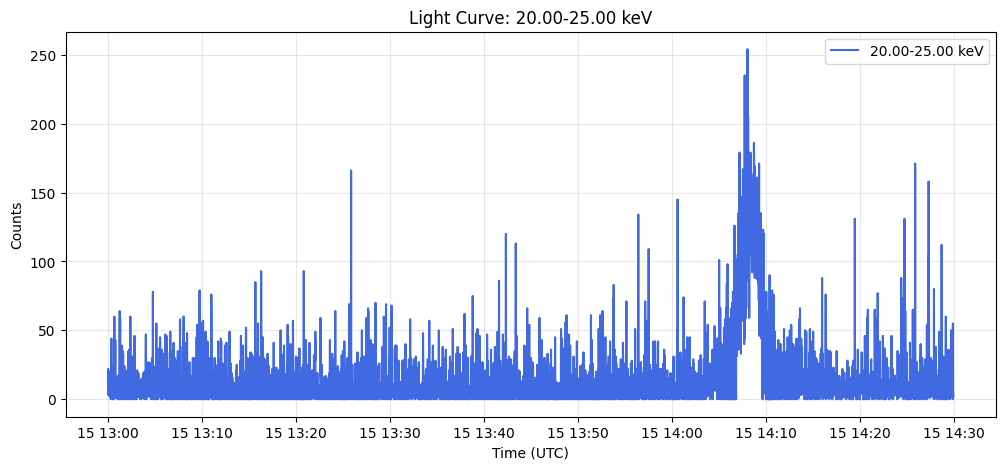

In [19]:
# Select an energy band to analyze
energy_band = "20.00-25.00 keV"

plt.figure(figsize=(12, 5))
plt.plot(df.index, df[energy_band], color='royalblue', label=energy_band)

plt.xlabel("Time (UTC)")
plt.ylabel("Counts")
plt.title(f"Light Curve: {energy_band}")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

**Step 3**. Smoothing (Rolling Mean). Here we apply a "rolling window" to help in visualizing the overall trend of the flare. 

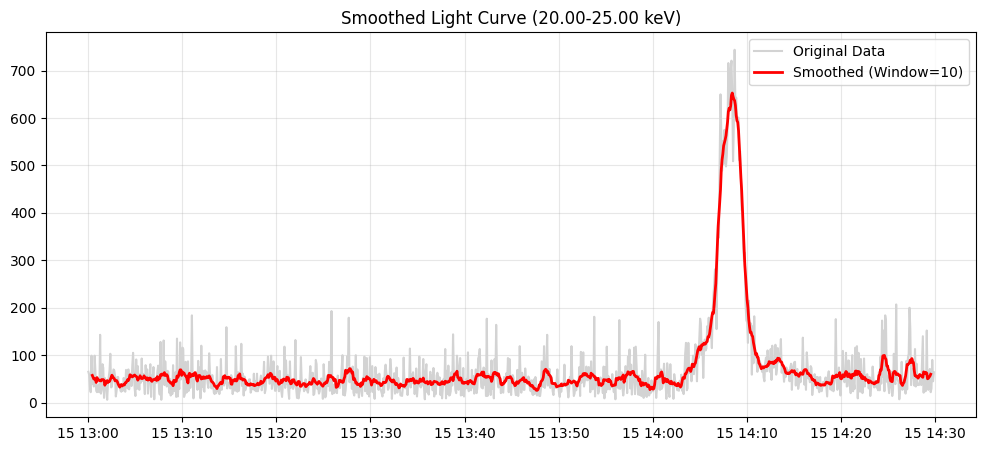

In [27]:
# Define smoothing window (e.g., 10 time steps)
window_size = 10

# Apply rolling mean
df["Smoothed"] = df[energy_band].rolling(window=window_size, center=True).mean()

plt.figure(figsize=(12, 5))
plt.plot(df.index, df[energy_band], color='lightgray', label='Original Data')
plt.plot(df.index, df["Smoothed"], color='red', linewidth=2, label=f'Smoothed (Window={window_size})')

plt.title(f"Smoothed Light Curve ({energy_band})")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

**Step 4**. Background subtraction

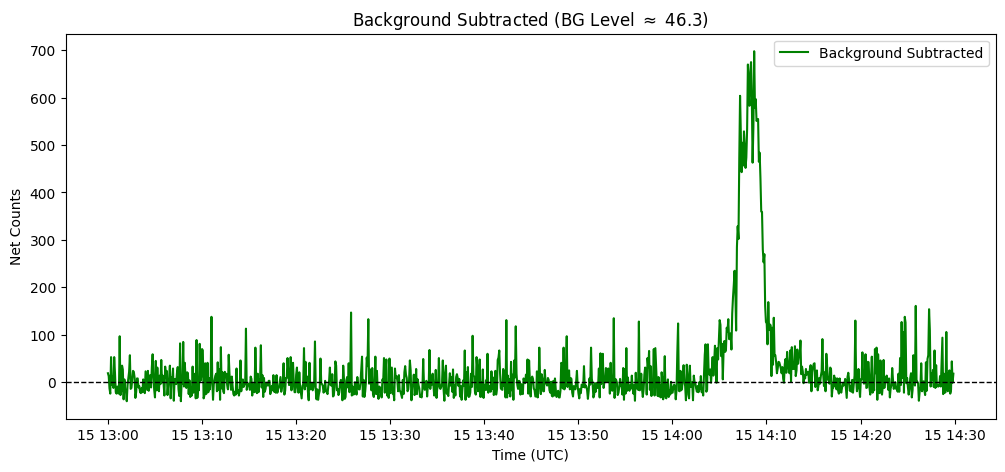

In [29]:
# 1. Estimate background (using the first 50 rows as the 'quiet' period)
# You can change .iloc[0:50] to any range that represents your background
bg_level = df[energy_band].iloc[0:50].mean()

# 2. Subtract background
df["Net_Counts"] = df[energy_band] - bg_level

plt.figure(figsize=(12, 5))
plt.plot(df.index, df["Net_Counts"], color='green', label='Background Subtracted')
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Zero line

plt.xlabel("Time (UTC)")
plt.ylabel("Net Counts")
plt.title(rf"Background Subtracted (BG Level $\approx$ {bg_level:.1f})")
plt.legend()
plt.show()

## Demo 2: Generating Type II Spectra from the Event Data using "evt-to-TypeII_V02.py"
This script takes the Event File and bins the events into a time-series of spectra, known as Type II PHA files. 
**Type II PHA**: A stack of spectra over time (Counts vs. Energy vs. Time). It allows you to see how the spectrum changes second-by-second. This script creates this time-resolved data. 
processes the "evt.fits" input file and produces six Type-II spectral files: 
- **4 Individual Spectra**: One each for CdTe1, CdTe1, CZT1, CZT2
- **2 Combined Spectra**: One summing both CdTe detectors and the other summing both CZT detectors.

In [3]:
%run ./analysis_tools/evt-to-TypeII_V02.py /home/manju/Documents/JAP_PhD2024/HEL1OS_Notebook_Tools_XpsecModels_Version2/HEL1OS_Instrument_DataAnalysisDemo/data/evt.fits

Type II spectra created: CdTe1_TypeII_spectra.fits
Type II spectra created: CdTe2_TypeII_spectra.fits
Type II spectra created: CZT1_TypeII_spectra.fits
Type II spectra created: CZT2_TypeII_spectra.fits
Type II spectra created: CdTe_Combined_TypeII_spectra.fits
Type II spectra created: CZT_Combined_TypeII_spectra.fits


 ## Demo 3: Generating Type I Spectra from the Type II Spectra using "TypeII-to-TypeI_V06_plotly.py" (Interactive)
This script is designed to convert continuous time-resolved spectral data (Type II PHA) into static spectral files (Type I PHA) for specific time intervals. It allows the user to view the solar flare light curve generated, pick the exact start and end times of the flare, and "slice" that data out into a file ready for spectral analysis.
1. **Inputs**:
   - ***CdTe Type II FITS file***: The spectral data from the CdTe detectors (Demo 2).
   - ***CZT Type II FITS file***: The spectral data from the CZT detectors (Demo 2).
2. **Outputs**:
   - ***Science Spectra***: Type I FITS files for the time range you select (e.g., the peak of the flare).
   - ***Background Spectra (Optional)***: Separate Type I FITS files for pre- or post-flare background selection.

**Usage**: 
1. Run the cell: "*python TypeII-to-TypeI_V06_plotly.py CdTe_Combined_TypeII_spectra.fits CZT_Combined_TypeII_spectra.fits*". The script will display an interactive Plotly light curve showing the intensity of the flare over time.
2. Explore: Hover over the graph to find the exact time (UTC) where the flare starts and ends.
3. Input Times: Scroll down to the input box and type the Start and End times (Format: YYYY-MM-DD HH:MM:SS).
4. Select Next Step: After generating the science spectrum, you can choose to:
   - \[N\] Select a **N**ew science interval (e.g., the decay phase).
   - \[B\] Generate **B**ackground spectra (allows different times for CdTe and CZT).
   - \[Q\] **Q**uit the tool.


In [ ]:
%run ./analysis_tools/TypeII-to-TypeI_V06_plotly.py CdTe_Combined_TypeII_spectra.fits CZT_Combined_TypeII_spectra.fits

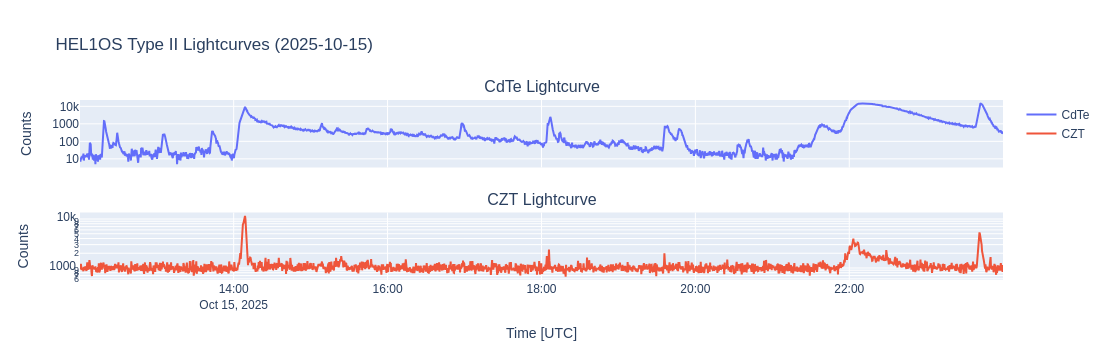


Lightcurves displayed.
You can now generate SCIENCE Type I PHA files by typing time ranges.
Times must be in the same absolute system as the lightcurve (DATE_OBS / TIME_OBS).
Example format:  2023-12-15 07:10:00



Enter START time for SCIENCE spectrum (YYYY-mm-dd HH:MM:SS) or press ENTER to quit:  2025-10-15 13:57:52
Enter END time   for SCIENCE spectrum (YYYY-mm-dd HH:MM:SS):  2025-10-15 15:04:12



Generating SCIENCE Type I PHA files for interval:
  2025-10-15 13:57:52  -->  2025-10-15 15:04:12
Science Type I file generated: cdte_135752_150412.fits
Science Type I file generated: czt_135752_150412.fits
------------------------------------------------------------



Next action? [N]ew science spectrum, [B]ackground (detector specific), [Q]uit:  B
Enter CdTe BACKGROUND START time (YYYY-mm-dd HH:MM:SS) or press ENTER to skip CdTe background:  2025-10-15 12:37:32
Enter CdTe BACKGROUND END time   (YYYY-mm-dd HH:MM:SS):  2025-10-15 13:00:52



Generating CdTe BACKGROUND for interval:
  2025-10-15 12:37:32  -->  2025-10-15 13:00:52
Background Type I file generated: cdte_back_123732_130052.fits


Enter CZT BACKGROUND START time  (YYYY-mm-dd HH:MM:SS) or press ENTER to skip CZT background:  2025-10-15 12:53:51
Enter CZT BACKGROUND END time    (YYYY-mm-dd HH:MM:SS):  2025-10-15 13:36:51



Generating CZT BACKGROUND for interval:
  2025-10-15 12:53:51  -->  2025-10-15 13:36:51
Background Type I file generated: czt_back_125351_133651.fits



Next action? [N]ew science spectrum, [B]ackground (detector specific), [Q]uit:  q


Exiting.


In [4]:
%run ./analysis_tools/TypeII-to-TypeI_V06_plotly.py CdTe_Combined_TypeII_spectra.fits CZT_Combined_TypeII_spectra.fits

### Can you visualize the spectra? 

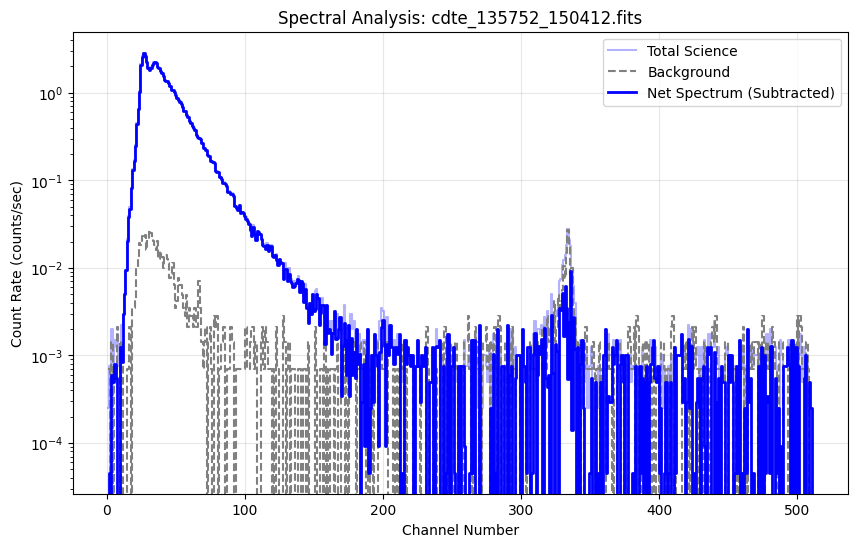

In [33]:
from astropy.io import fits
import matplotlib.pyplot as plt

# --- 1. Define your files ---
sci_file = "cdte_135752_150412.fits"        # <--- Your Science File
bg_file  = "cdte_back_123732_130052.fits"   # <--- Your Background File

# --- 2. Load the Science Data ---
hdul_sci = fits.open(sci_file)
data_sci = hdul_sci['SPECTRUM'].data
header_sci = hdul_sci['SPECTRUM'].header

channels = data_sci['CHANNEL']
counts_sci = data_sci['COUNTS']
exp_sci = header_sci['EXPOSURE']
rate_sci = counts_sci / exp_sci  # Convert to Rate (Counts/sec)

hdul_sci.close() # Good practice to close the file

# --- 3. Load the Background Data ---
hdul_bg = fits.open(bg_file)
data_bg = hdul_bg['SPECTRUM'].data
header_bg = hdul_bg['SPECTRUM'].header

counts_bg = data_bg['COUNTS']
exp_bg = header_bg['EXPOSURE']
rate_bg = counts_bg / exp_bg    # Convert to Rate (Counts/sec)

hdul_bg.close()

# --- 4. Calculate Net Spectrum ---
# Logic: Net = Total Science - Background
rate_net = rate_sci - rate_bg

# --- 5. Plot Everything ---
plt.figure(figsize=(10, 6))

# A. Plot the Raw Science Data
plt.step(channels, rate_sci, where='mid', color='blue', alpha=0.3, label='Total Science')

# B. Plot the Background
plt.step(channels, rate_bg, where='mid', color='gray', linestyle='--', label='Background')

# C. Plot the Net (Result)
plt.step(channels, rate_net, where='mid', color='blue', linewidth=2, label='Net Spectrum (Subtracted)')

# Formatting
plt.yscale('log') # Log scale is important for spectra
plt.xlabel('Channel Number')
plt.ylabel('Count Rate (counts/sec)')
plt.title(f'Spectral Analysis: {sci_file}')
plt.legend()
plt.grid(True, alpha=0.3)

plt.show()